##### Week 6:
More machine learning
    - Tree-based models
    - Regularization
 
 Coding task:

 Try using regularization or a tree-based model to improve your model's performance on the BRFSS dataset.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from cm import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
brfss = pd.read_csv('../data/brfss.csv')

In [23]:
brfss.head()

,GENHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,_RFHYPE5,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,...,EXERANY2,_METSTAT,_URBSTAT,_IMPRACE,_RFBMI5,_RFSMOK3,_RFBING5,_RFDRHV7,_TOTINDA,target
0,Good,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,Yes,Yes,No,No,No,...,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,No physical activity or exercise in last 30 days,True
1,Fair,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,No,No,No,No,...,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,Had physical activity or exercise,True
2,Good,Yes,More than one,No,Within past year (anytime less than 12 months ...,Yes,No,No,No,No,...,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,Had physical activity or exercise,True
3,Very good,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,No,No,No,No,...,Yes,"Nonmetropolitan counties (_URBNRRL = 5,6)",Rural counties (_URBNRRL = 6),"White, Non-Hispanic",Yes,Yes,No,No,Had physical activity or exercise,True
4,Poor,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,Yes,No,No,No,...,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,No physical activity or exercise in last 30 days,True


## Logistic regression model

In [24]:
categorical_variables = ['GENHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST']
brfss = pd.get_dummies(brfss, columns = categorical_variables)

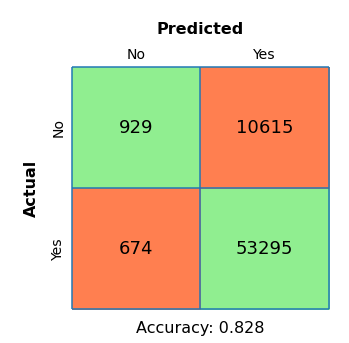

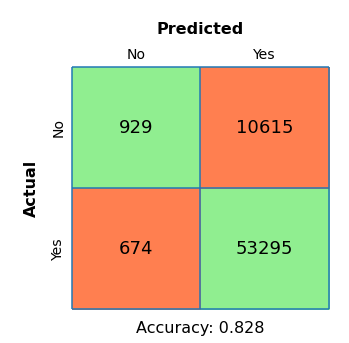

In [25]:
# X = brfss.drop(columns = ['AHD'])
X = brfss[['GENHLTH_Good','HLTHPLN1_No','PERSDOC2_More than one','MEDCOST_No']]
y = brfss['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,     # Keep the same proportions of the target in the training and test data
                                                    test_size = 0.25,
                                                    random_state = 321)
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)
y_pred = logreg.predict(X_test)
y_pred = logreg.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')

## Tree-based models

In [26]:
tree = DecisionTreeClassifier(random_state = 321).fit(X_train, y_train)

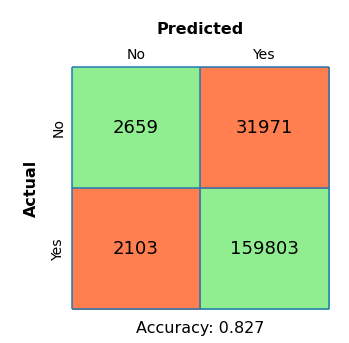

In [27]:
y_pred = tree.predict(X_test)
plot_confusion_matrix(y_train, tree.predict(X_train), labels = ['No', 'Yes'], metric = 'accuracy')

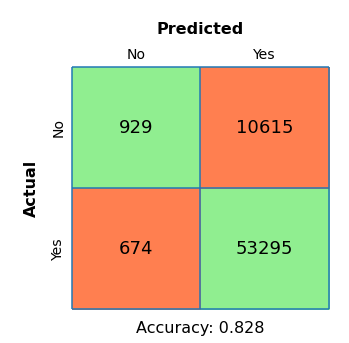

In [28]:
y_pred = tree.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')

In [29]:
roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])

0.6095446489538469

0.6095437581290571

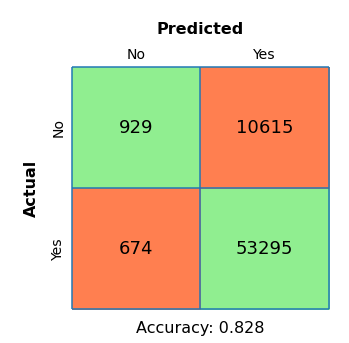

In [30]:
forest = RandomForestClassifier(random_state = 321)
forest.fit(X_train, y_train)
forest = RandomForestClassifier(random_state = 321)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')
roc_auc_score(y_test, forest.predict_proba(X_test)[:,1])
roc_auc_score(y_test, forest.predict_proba(X_test)[:,1])


In [31]:
forest = RandomForestClassifier(n_estimators = 1000, max_depth = 5, min_samples_leaf = 5, random_state = 321)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=1000,
                       random_state=321)

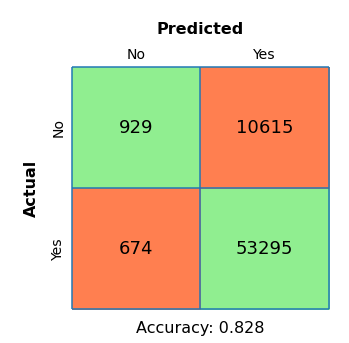

In [32]:
y_pred = forest.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')

In [33]:
roc_auc_score(y_test, forest.predict_proba(X_test)[:,1])

0.6095446489538469

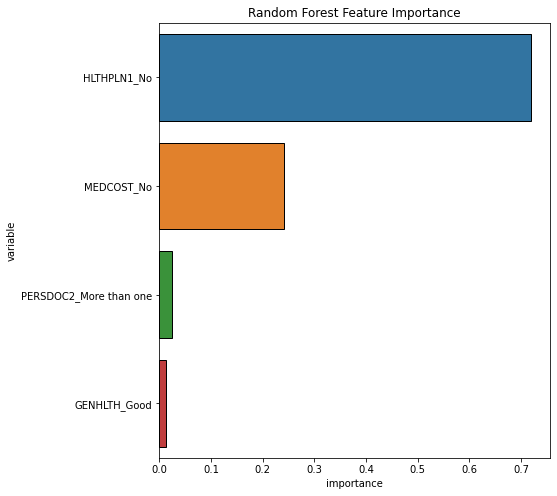

In [34]:
importances = pd.DataFrame({'variable': X.columns,
                           'importance': forest.feature_importances_}).sort_values('importance', ascending = False)


fig, ax = plt.subplots(figsize = (7,8))
sns.barplot(data = importances,
            x = 'importance', y = 'variable', ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance');